In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [4]:
train = datasets.MNIST("", train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train = False, download = True, transform = transforms.Compose([transforms.ToTensor()])) 

trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [5]:
import torch.nn as nn
import torch.nn.functional as F

torch.nn has all the basic building blocks to build graphs.

Next, we will build the class for neural networks.

In [12]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() # super corresponds to nn.module and it's just initializing nn.module and everything related to it
        self.fc1 = nn.Linear(784, 64) #fc1 just means fully connected, 784 is 28*28 is the input which will be a flat row of pixels
        # our target is to make a 3 layers of 64 neurons for hidden layers, which is the output
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x): # for feed forward network with input x
        x = F.relu(self.fc1(x)) # x will pass through fully connected layer 1, and we run the activation function over the entire layer
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim = 1) # We apply softmax on the last layer to get a certain value as 1 corresponding to the digit
    

We can throw logic in this forward method and dictate what to do accordingly.. also a lot of fancy things can be done with it.

### What is __init__ used for?
\_\_init\_\_ just initializes all the attributes of the object. If you don't write \_\_init\_\_, you'll have to initialize all the attributes seperately by writting obj.atri1 = v1, obj.atri2 = v2 and so on.

### What is super() used for?
In the hierarchy of classes, there is a super class, and when we write super() we initialize all of it's attributes and functions for the attributes of our class.


Now we can print and see the Net that we created

In [14]:
net = Net()

print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


### Common Errors
If we forgot to write super().\_\_init\_\_(), we will get the error: "Attribute Error: cannot assign module before Module.\_\_init\_\_() call 

## Optimizer and Loss function
Let's define optimizer and loss function for the model 

In [17]:
import torch.optim as optim

# Using Adam optimizer
optimizer = optim.Adam(net.parameters(), lr = 0.001) # net.parameters() corresponds to everything that is adjustable in our model, lr is the learning rate

EPOCHS = 3 # A full pass through the data is called an epoch
for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and labels
        X, y = data
        net.zero_grad() # Do this everytime before you pass the data through the neural network, otherwise the gradients will keep on adding
        output = net(X.view(-1, 28*28)) # -1 will tell the view that the size can be anythin, basically to satisfy what the Net requires as the tensor shape
#         print(output)
        loss = F.nll_loss(output, y) # If the data is a one hot vector form ([0, 0, 1, 0, 0]) then use nll_loss
        # Now, we need to backpropogate the loss, we just write:
        loss.backward()
        optimizer.step() # This will adjust the steps for us
    print(loss)

tensor(0.0094, grad_fn=<NllLossBackward0>)
tensor(5.6288e-05, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)


## Testing the data
Moving on to the testing part, we use torch.no_grad() because we don't want to learn from that data

In [20]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print('Accuracy: ', round(correct/total, 3))

Accuracy:  0.974


Now let's just see what our model predicted for a given value

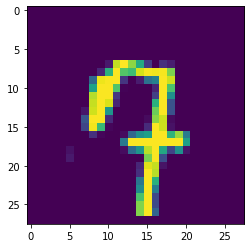

In [21]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28, 28))

In [22]:
print(torch.argmax(net(X.view(-1, 28*28))[0]))

tensor(7)


Our model was able to predict 7 